### **图像仿射变换**

仿射变换插值方法：
* WARP_FILL_OUTLIERS 填充所有输出的像素，如果部分像素落在输入图像的边界外，那么值设定为fillval
* WARP_INVERSE_MAP 表示参数M为输出图像到输入图像的反变换

像素边界外推方法：
* BORDER_CONSTANT 用特定值填充，如iiiii|abcdefgh|iiiiiiii
* BORDER_REPLICATE 两端复制填充，如aaaaaaa|abcdefgh|hhhhhhhh
* BORDER_REFLECT 倒序填充，如fedcba|abcdefgh|hgfedcb
* BORDER_WRAP 正序填充，如cdefgh|abcdefgh|abcdefgh
* BORDER_REFLECT_101 不包含边界值倒序填充，如gfedcb|abcdefgh|gfedcba
* BORDER_TRANSPARENT 随机填充，如gpaitna|abcdefgh|ksugnaxyiq
* BORDER_ISOLATED 不关心感兴趣区域之外的部分

In [1]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [2]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'lena.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read lena.jpg')
    sys.exit

In [3]:
# 设置图像旋转角度、尺寸、旋转中心等参数
angle = 30
h, w = img.shape[:-1] # 获取图像的长和高
size = (w, h) # 计算图像大小
center = (w / 2.0, h / 2.0) # 计算旋转中心

In [4]:
# 进行仿射变换矩阵
rotation0 = cv.getRotationMatrix2D(center, angle, 0.8)
# 进行仿射变换
img_wrap0 = cv.warpAffine(img, rotation0, size)

In [5]:
# 根据定义的3个点进行仿射变换
src_points = np.array([[0, 0], [0, h-1], [w-1, h-1]],dtype='float32') # 原图像中3个像素的图标
dst_points = np.array([[w*0.11, h*0.2], [w*0.15, h*0.7], [w*0.81, h*0.85]],dtype='float32') # 目标图像中3个像素的图标
rotation1 = cv.getAffineTransform(src_points, dst_points)
img_wrap1 = cv.warpAffine(img, rotation1, size)

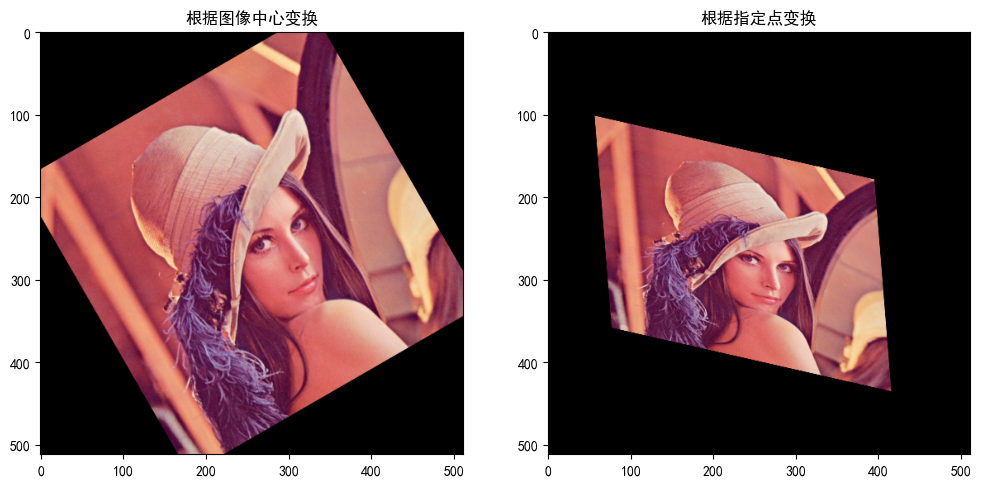

In [6]:
# 展示结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('根据图像中心变换')
plt.imshow(img_wrap0)
plt.subplot(1, 2, 2)
plt.title('根据指定点变换')
plt.imshow(img_wrap1)